In [ ]:
# Çalışmada kullanılan veri seti aşağıdaki kaynaktan alınmıştır.

#https://www.kaggle.com/datasets/imdevskp/corona-virus-report/data?select=covid_19_clean_complete.csv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
path=r'C:\Users\Lenovo\Desktop\covid_19_clean_complete.csv'
df=pd.read_csv(path)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


* Lat (Latitude of the location): bir konumun enlemi
* Long (Longitude of the location): bir konumun boylamı
* Date(Date of cumulative report): kümülatif raporun tarihini gösterir
* Confirmed (Cumulative number of confirmed cases till this day): kümülatif onaylanmış Covid-19 vaka sayısı
* Deaths (Cumulative number of deaths till this day): toplam Covid-19 kaynaklı ölüm sayısı 
* Recovered (Cumulative number of recovered cases till this day): iyileşmiş toplam Covid-19 vakalarının sayısı
* Active: hastalığı geçirmekte olan toplam kişi sayısı

Açıklamalar veri seti kaynağının detail kısmından alınmıştır.

In [8]:
df.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.06910,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.47350,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.86880,151.209300,2020-01-22,0,0,0,0,Western Pacific


In [10]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [12]:
# Analizlerimi ülke-bölge bazlı ilerleteceğim için Province/State, long ve lang sütunlarına ihtiyacım olmayacak. 
# Bu nedenle df'in bir kopyasını oluşturup belirttiğim sütunları sileceğim.

In [14]:
c_df = df.copy()
c_df = c_df.drop(["Province/State", "Lat", "Long"], axis=1)
c_df.shape

(49068, 7)

In [16]:
c_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,49068.0,16884.904255,127300.205272,0.0,4.0,168.0,1518.25,4290259.0
Deaths,49068.0,884.179160,6313.584411,0.0,0.0,2.0,30.00,148011.0
Recovered,49068.0,7915.713479,54800.918731,0.0,0.0,29.0,666.00,1846641.0
Active,49068.0,8085.011617,76258.903026,-14.0,0.0,26.0,606.00,2816444.0


In [18]:
#İstatistiksel özet tablosunda aktive sütununda negatiflik var. Kontrol edilmeli

num_cols = ["Confirmed", "Deaths", "Recovered", "Active"] #Aktive sütunuyla ilişkili değişkenler

# Negatif değer olan satırlar
negative_row = (c_df[num_cols] < 0).any(axis=1)

negative_df = c_df[negative_row]

print(negative_df.shape)

negative_df

(18, 7)


,Country/Region,Date,Confirmed,Deaths,Recovered,Active,WHO Region
16238,China,2020-03-24,168,6,168,-6,Western Pacific
16499,China,2020-03-25,168,6,168,-6,Western Pacific
16760,China,2020-03-26,168,6,168,-6,Western Pacific
17021,China,2020-03-27,168,6,168,-6,Western Pacific
17282,China,2020-03-28,168,6,168,-6,Western Pacific
17543,China,2020-03-29,168,6,168,-6,Western Pacific
17804,China,2020-03-30,168,6,168,-6,Western Pacific
18065,China,2020-03-31,168,6,168,-6,Western Pacific
18326,China,2020-04-01,168,6,168,-6,Western Pacific
32059,United Kingdom,2020-05-23,558,45,515,-2,Europe


Active cases = Cumulative confirmed cases - (Cumulative recovered cases + Cumulative deaths)

Veriler matematiksel olarak formülü sağlar. Ancak, toplam vaka sayısının (confirmed) ölü (deaths) ve iyileşen (recovered) sayılarının toplamından küçük olması gerçekçi değildir. Çünkü toplam vaka sayısı, ölü ve iyileşenlerin toplamından her zaman büyük veya onlara eşit olmalıdır.

In [21]:
error_confirmed = c_df["Confirmed"] < (c_df["Deaths"] + c_df["Recovered"])

print(error_confirmed.sum())

print(c_df[error_confirmed].head())

18
      Country/Region        Date  Confirmed  Deaths  Recovered  Active  \
16238          China  2020-03-24        168       6        168      -6   
16499          China  2020-03-25        168       6        168      -6   
16760          China  2020-03-26        168       6        168      -6   
17021          China  2020-03-27        168       6        168      -6   
17282          China  2020-03-28        168       6        168      -6   

            WHO Region  
16238  Western Pacific  
16499  Western Pacific  
16760  Western Pacific  
17021  Western Pacific  
17282  Western Pacific  


Negatif verilerin aynı zamanda vaka sayısındaki problemli veriler olduğu görülüyor.

In [28]:
# Eşit olanların kontrolü

equal_confirmed = c_df["Confirmed"] == (c_df["Deaths"] + c_df["Recovered"])

print(equal_confirmed.sum())

print(c_df[equal_confirmed].tail())

14151
       Country/Region        Date  Confirmed  Deaths  Recovered  Active  \
49036        Dominica  2020-07-27         18       0         18       0   
49037         Grenada  2020-07-27         23       0         23       0   
49052  United Kingdom  2020-07-27          3       0          3       0   
49053  United Kingdom  2020-07-27          8       1          7       0   
49059  United Kingdom  2020-07-27         13       0         13       0   

      WHO Region  
49036   Americas  
49037   Americas  
49052     Europe  
49053     Europe  
49059     Europe  


In [30]:
# Çin için deaths ve aktive 0 olması
china_mask = (c_df["Country/Region"] == "China") & (c_df["Confirmed"] < c_df["Deaths"] + c_df["Recovered"])

c_df.loc[china_mask, ["Deaths", "Active"]] = 0

# Geriye kalan mantıksız satırların silinmesi
other_mask = (c_df["Country/Region"] != "China") & (c_df["Confirmed"] < c_df["Deaths"] + c_df["Recovered"])

c_df = c_df[~other_mask]

error_confirmed = c_df["Confirmed"] < (c_df["Deaths"] + c_df["Recovered"])
c_df = c_df[~error_confirmed].copy()


In [32]:
c_df.shape

(49059, 7)

In [83]:
print(c_df[error_confirmed].head())

Empty DataFrame
Columns: [Country/Region, Date, Confirmed, Deaths, Recovered, Active, WHO Region]
Index: []


In [34]:
# IQR yöntemi ile aykırı değer kontrolü

num_cols = ["Confirmed", "Deaths", "Recovered", "Active"]

outlier_flags = pd.DataFrame(0, index=c_df.index, columns=num_cols)

for col in num_cols:
    Q1 = c_df[col].quantile(0.05)  
    Q3 = c_df[col].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_flags[col] = ((c_df[col] < lower_bound) | (c_df[col] > upper_bound)).astype(int)


In [36]:
# Aykırı satırlar

outlier_indices = outlier_flags[(outlier_flags > 0).any(axis=1)].index
outlier_indices.shape

(2095,)

In [44]:
outlier_rows = c_df.loc[outlier_indices]
print(outlier_rows.head())  


      Country/Region        Date  Confirmed  Deaths  Recovered  Active  \
14938          China  2020-03-19      67800    3130      57682    6988   
15199          China  2020-03-20      67800    3133      58382    6285   
15460          China  2020-03-21      67800    3139      58946    5715   
15721          China  2020-03-22      67800    3153      59433    5214   
15795          Italy  2020-03-22      59138    5476       7024   46638   

            WHO Region  
14938  Western Pacific  
15199  Western Pacific  
15460  Western Pacific  
15721  Western Pacific  
15795           Europe  


İstatistiksel olarak uç (outlier) gibi görünüyor ama veriler epidemiyolojik olarak normal gözükmektedir.

                WHO Region Country/Region  Confirmed
40                  Africa   South Africa     452529
80                Americas             US    4290259
87   Eastern Mediterranean           Iran     293606
148                 Europe         Russia     816680
164        South-East Asia          India    1480073
182        Western Pacific    Philippines      82040


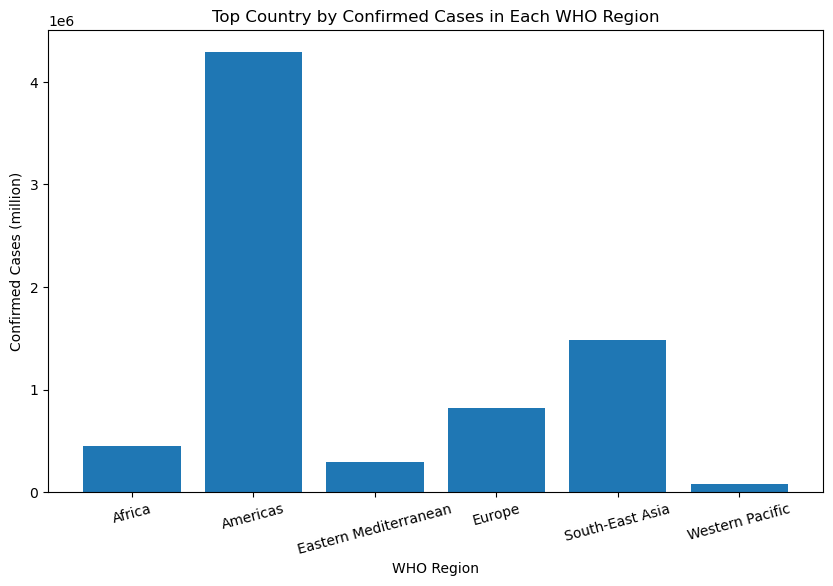

In [47]:
# Her ülke için maksimum vaka sayısı
country_max = c_df.groupby(["WHO Region", "Country/Region"])["Confirmed"].max().reset_index()

# Her WHO Region'dan en çok vakaya sahip ülke
top_countries_by_region = country_max.loc[country_max.groupby("WHO Region")["Confirmed"].idxmax()]


print(top_countries_by_region[["WHO Region", "Country/Region", "Confirmed"]])


plt.figure(figsize=(10,6))
plt.bar(top_countries_by_region["WHO Region"], top_countries_by_region["Confirmed"])
plt.title("Top Country by Confirmed Cases in Each WHO Region")
plt.xlabel("WHO Region")
plt.ylabel("Confirmed Cases (million)")
plt.xticks(rotation=15)
plt.show()


In [49]:
# Veri setinde Date değişkeninin tipi object olarak verilmişti. Modelleme öncesi datetime64 tipine dönüştürüldü.  

c_df["Date"] = pd.to_datetime(c_df["Date"])


In [64]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49059 entries, 0 to 49067
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  49059 non-null  object        
 1   Date            49059 non-null  datetime64[ns]
 2   Confirmed       49059 non-null  int64         
 3   Deaths          49059 non-null  int64         
 4   Recovered       49059 non-null  int64         
 5   Active          49059 non-null  int64         
 6   WHO Region      49059 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 4.0+ MB


In [66]:
print(c_df["Date"].dt.year.unique())
#veri setinde sadece 2020 yılına ait veriler varmış

[2020]


In [53]:
# Ülkelere göre haftalık ölüm sayısını tahmin eden model kuracağım.

In [55]:
weekly = c_df.groupby([
    c_df["Country/Region"],
    c_df["Date"].dt.isocalendar().week
]).agg({
    "Confirmed": "max",   #Kümülatif veride  hafta sonundaki toplamı almak için max kullanıldı
    "Deaths": "max",
    "Recovered": "max",    
    "Active": "max",
    "WHO Region": "first"
}).reset_index()

# Her ülke için, her haftada kaç yeni ölüm gerçekleşti
weekly["Weekly_Deaths"] = weekly.groupby("Country/Region")["Deaths"].diff().fillna(weekly["Deaths"])

In [57]:
# One Hot Encoded

weekly_encoded = pd.get_dummies(
    weekly,
    columns=["Country/Region", "WHO Region"],
    drop_first=True
)


In [68]:
X = weekly_encoded.drop(["Deaths", "Weekly_Deaths"], axis=1)
y = weekly_encoded["Weekly_Deaths"]

In [70]:
# Tuning

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, None],
    "min_samples_split": [2, 5]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring="neg_mean_absolute_error")
grid_search.fit(X, y)

print("En iyi parametreler:", grid_search.best_params_)


En iyi parametreler: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [72]:
# Eğitim ve test setini ayıralım 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# En iyi parametrelerle model kuruldu
from sklearn.ensemble import RandomForestRegressor

best_rf = RandomForestRegressor(
    max_depth=10,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)
best_rf.fit(X_train, y_train)

# Test setinde tahmin işlemi
y_pred = best_rf.predict(X_test)

# Metriklerle sonuçlar değerlendirildi
from sklearn.metrics import mean_absolute_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 47.8750948815053
R2 Score: 0.8629363051876486


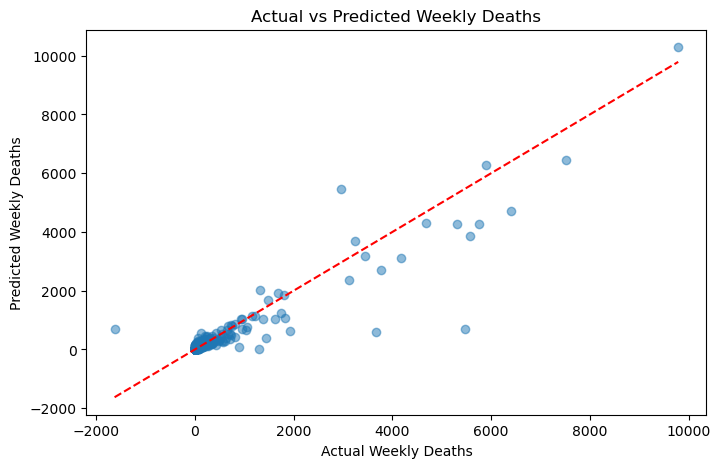

In [77]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Weekly Deaths")       
plt.ylabel("Predicted Weekly Deaths")    
plt.title("Actual vs Predicted Weekly Deaths")  
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [85]:
# Haftalık ölüm hesabında kullanılan kümülatif “Deaths” sütununda, bir haftadan diğerine “azalma” (negatif fark) olabilir.

print(weekly[weekly["Weekly_Deaths"] < 0])


        Country/Region  week  Confirmed  Deaths  Recovered  Active  \
1312           Czechia    28      13174     352       8247    4575   
2192           Iceland    12        568       1         36     531   
2501        Kazakhstan    13        284       1         20     263   
3667  Papua New Guinea    31         62       0         11      51   
4237          Slovakia    13        314       0          7     312   
4414             Spain    22     239479   27127     150376   61976   
5055         Venezuela    19        414      10        193     211   

           WHO Region  Weekly_Deaths  
1312           Europe           -1.0  
2192           Europe           -4.0  
2501           Europe           -2.0  
3667  Western Pacific           -1.0  
4237           Europe           -1.0  
4414           Europe        -1625.0  
5055         Americas           -6.0  


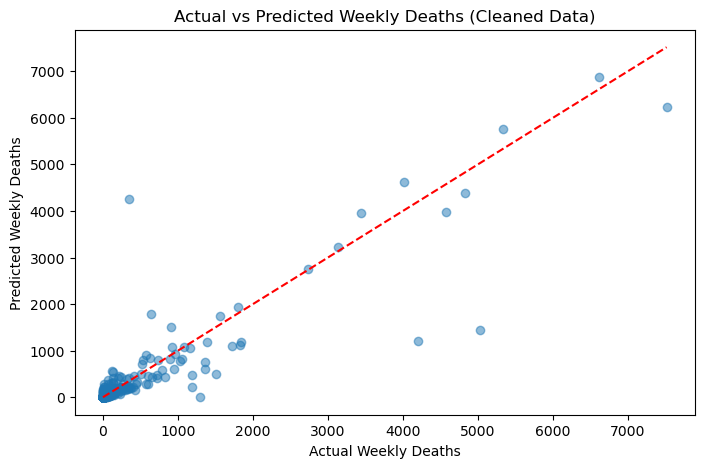

In [91]:
# Haftalık ölüm sayısı 0 veya pozitif olanların seçilmesi

weekly_clean = weekly[weekly["Weekly_Deaths"] >= 0].reset_index(drop=True)

weekly_encoded = pd.get_dummies(
    weekly_clean,
    columns=["Country/Region", "WHO Region"],
    drop_first=True
)

X = weekly_encoded.drop(["Deaths", "Weekly_Deaths"], axis=1)
y = weekly_encoded["Weekly_Deaths"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Yeniden model kurulması

best_rf = RandomForestRegressor(
    max_depth=10,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Weekly Deaths")
plt.ylabel("Predicted Weekly Deaths")
plt.title("Actual vs Predicted Weekly Deaths (Cleaned Data)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [99]:
print((weekly_clean["Weekly_Deaths"] < 0).sum())



0


In [101]:
mae_clean = mean_absolute_error(y_test, y_pred)
r2_clean = r2_score(y_test, y_pred)
print("MAE (Cleaned):", mae_clean)
print("R2 (Cleaned):", r2_clean)


MAE (Cleaned): 40.88926055823892
R2 (Cleaned): 0.8272893396750253



ilk oluşturduğum modelde (Negatif haftalık ölüm kayıtları içeren model),  MAE (Mean Absolute Error) yaklaşık 48, R² skoru ise 0.86 olarak gerçekleşmiştir. Ancak, veri setinden negatif haftalık ölüm değerleri temizlendikten sonra model yeniden eğitilmiş ve test edilmiştir. Temizlenmiş veriyle yapılan analizde MAE yaklaşık 41'e gerilerken, R² skoru 0.83’e düşmüştür. Bu durum, negatif değerlerin modelde hata skorlarını nispeten olumlu yönde etkilediğini, ancak veri bütünlüğü açısından bu değerlerin çıkarılmasının daha gerçekçi ve güvenilir sonuçlar verdiğini göstermiştir. Sonuç olarak, gerçekçi ve mantıklı tahminler için veri temizliğinden sonra elde edilen skorlar daha anlamlıdır.

